Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

Loading the dataset

In [ ]:
mnist= tf.keras.datasets.mnist

Dividing the images and their outputs into x_train and x_test sets

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
     

11490434/11490434 [==============================] - 0s 0us/step


Cheking the data set images, which needed to be identified by the neural network

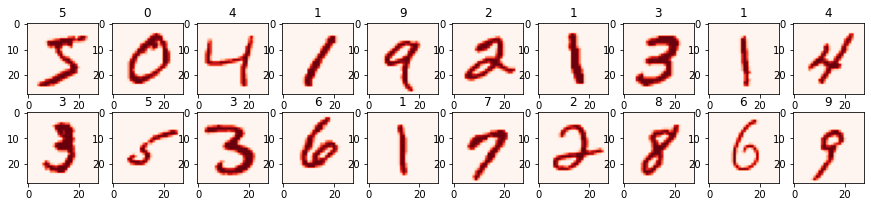

In [ ]:
fig=plt.figure(figsize=(15,3))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1)
  ax.imshow(np.squeeze(x_train[i]),cmap='Reds')
  ax.set_title(y_train[i])

Printing the data images into metrics form

In [ ]:
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

Normalizing the matrix array of number images

In [ ]:
xtrain = x_train/255.0
xtest = x_test/255.0

Flattening the 2-dimensional array into one dimensional array or a single column; which will behave as 1st inpur layer for neural network

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation ='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Using of AdamOptimizer

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
            metrics=['accuracy'])

Fitting of the training data into the model for 5 iterations

In [ ]:
model.fit(xtrain,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2650 - accuracy: 0.9251
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1196 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0808 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0605 - accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0474 - accuracy: 0.9856


98% Accuracy achieved with 5 iterations

Fitting of the training data into the model for 9 iterations

In [ ]:
model.fit(xtrain,y_train, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0378 - accuracy: 0.9886
Epoch 2/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0292 - accuracy: 0.9910
Epoch 3/9
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0235 - accuracy: 0.9930
Epoch 4/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0202 - accuracy: 0.9938
Epoch 5/9
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0168 - accuracy: 0.9951
Epoch 6/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 7/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0122 - accuracy: 0.9962
Epoch 8/9
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0098 - accuracy: 0.9969
Epoch 9/9
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0098 - accuracy: 0.9971


99% Accuracy achieved with 9 iterations

In [ ]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 22.7876 - accuracy: 0.9767
[22.78759765625, 0.9767000079154968]


97 % of total accuracy of our neural network has been achieved

In [ ]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 5.6685 - accuracy: 0.9886 - val_loss: 3.1104 - val_accuracy: 0.9932
Epoch 2/10
1688/1688 [==============================] - 11s 6ms/step - loss: 1.9366 - accuracy: 0.9945 - val_loss: 3.6247 - val_accuracy: 0.9915
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 2.0790 - accuracy: 0.9938 - val_loss: 2.7341 - val_accuracy: 0.9932
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 1.9695 - accuracy: 0.9944 - val_loss: 3.4175 - val_accuracy: 0.9928
Epoch 5/10
1688/1688 [==============================] - 9s 6ms/step - loss: 1.7879 - accuracy: 0.9944 - val_loss: 2.9841 - val_accuracy: 0.9947
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 1.4884 - accuracy: 0.9948 - val_loss: 4.2958 - val_accuracy: 0.9910
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 1.7214 - accuracy: 0.9946 - val_loss: 5.0820 - val_accuracy

Plotting Accuracy of Model

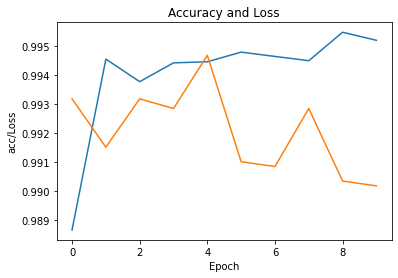

In [ ]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history["val_accuracy"],label='val')
plt.show()

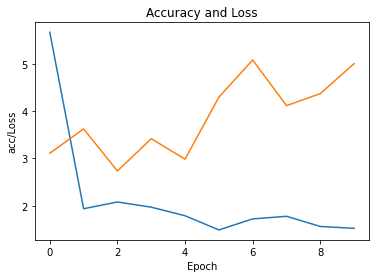

In [ ]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['loss'],label='acc')
plt.plot(history.history["val_loss"],label='val')
plt.show()

Testing Our Model

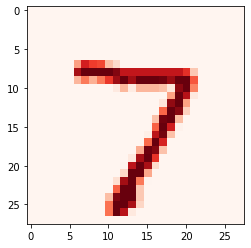

In [ ]:
plt.imshow(np.squeeze(x_test[0]),cmap="Reds")

In [ ]:

prediction=model.predict(x_test)
print(np.argmax(prediction[0]))

313/313 [==============================] - 1s 2ms/step
7


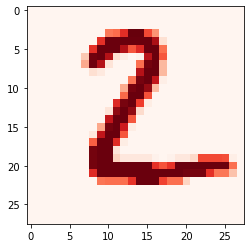

In [ ]:
plt.imshow(np.squeeze(x_test[1]),cmap="Reds")

In [ ]:
prediction=model.predict(x_test)
print(np.argmax(prediction[1]))

313/313 [==============================] - 1s 2ms/step
2
